# Pressure and Forces

* Pressure is the force per unit perpendicular area over which the force is applied. In equation form, pressure is defined as $P=F/A$
* The SI unit of pressure is pascal and 1 Pa =1 N/m
* 1 atm=1.01 x 10 Pa
* Pressure is a scalar quantity 
* Pressure is the weight of the fluid 𝓂ℊ divided by the area A supporting it (the area of the bottom of the container): $P=mg/A$
* Pressure is force per unit area. 
* Newton's third law still applies  
* All portions of the fluid must be in static equilibrium
* All points at the same depth must be at the same pressure
* The pressure P at a depth h below the surface of a liquid open to the atmosphere is greater than atmospheric pressure by the amount $\rho gh$








In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
def Pressure(F,A):
    P = F/A
    return P   

F = 1.22E5
A = np.linspace(0,100,25)
y = Pressure(F,A)

plt.scatter(A,y)
plt.xlabel('Cross Sectional Area (m^2)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure vs Cross Sectional Area')

In [ ]:
def Pressure(F,A):
    P = F/A
    return P

F = 1.22E5
A = np.linspace(0,100,10)
y = Pressure(F,A)

plt.scatter(1/A,y)
plt.xlabel('1/Cross Sectional Area (m^-2)')
plt.ylabel('Pressure (Pa)')
plt.title('Linearized Pressure vs Cross Sectional Area')

In [ ]:
def Pressure(rho,g,h):
    P = rho*g*h
    return P


h = np.linspace(0,100,10) #displacement is negative 
rho = 1E3
g = 9.81
y = Pressure(rho,g,h)

plt.scatter(h,y)
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure vs Depth in Water')

In [ ]:
rho = 1E3
g = 9.81
h = 0
dh = 5     #set up the delta h incraments
P1 = 1.01E5
P = 0
PList = []  #create an empty list for pressure
hList= []   #create an empty list for depth

while h < 100:         #loop through h = 0 to h = -100
    dP = P1 + rho*g*dh
    P = P + dP
    h = h + dh
    PList.append(P)     #Adding each new value of P to the list 
    hList.append(h)     #Adding each new value of h to the list 
    
print('Pressure',PList)
print('Depth',hList)

In [ ]:
plt.scatter(hList,PList)
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (Pa)')
plt.title('Pressure vs Depth in Water')

In [ ]:
import seaborn as sb

In [ ]:
def Pressure(P1,rho,g,h):
    P = P1 + rho*g*h
    return P

h = np.linspace(0,100,100)
x = np.linspace(0,100,100)
x,h = np.meshgrid(x,h)
P1 = 1.01E5
rho = 1E3
g = 9.81
z = Pressure(P1,rho,g,h)
ax = sb.heatmap(z)
plt.xlabel('Range (m)')
plt.ylabel('Depth (m) ')
plt.title('Pressure vs Depth of Water')

In [ ]:
x = np.linspace(0,100,100)
x,h = np.meshgrid(x,hList)
z = Pressure(P1,rho,g,h)
ax = sb.heatmap(z)
plt.xlabel('Range (m)')
plt.ylabel('Depth (m) ')
plt.title('Pressure vs Depth of Mercury')

In [ ]:
from vpython import *
import numpy as np
scene = canvas(width=800, height=800,
     center=vector(0,25,0))
scene.background = color.gray(0.8)

In [ ]:
t  = 0
dt=0.01
g=9.8
vy = 1
m_st = 10
rho_st = 1.8E3
rho_w = 1.0E3
volume = m_st/rho_st
m_w = rho_w*volume
F_b = rho_w*g*volume
#fracsub = volume_sub/ volume


water = box(pos= vector(0,0,0),color=color.blue,size=vector(100,100,100),opacity = 0.5)
mass = box(pos=vector(0,1,0), color=color.red, length=10,width=10,height=10,velocity=vector(0,vy,0)
           ,F_g=vector(0,-m_st*g,0),F_b=vector(0,F_b,0))
F_g = attach_arrow(mass, "F_g", color=color.green)
F_b = attach_arrow(mass, "F_b", color=color.yellow)


while 55.5>mass.pos.y >-45:
  rate(100)
  Fy = m_w*g-m_st*g
  mass.force = vector(0,Fy,0)
  mass.velocity = mass.velocity + mass.force/m_st * dt
  mass.pos = mass.pos + mass.velocity * dt
  t = t + dt

# Viscous Fluid Flow

* Viscosity refers to the internal friction of a fluid 
* If fluid flow in a tube has negligible resistance, the speed is the same all across the tube.
* When a viscous fluid flows through a tube, its speed at the walls is zero, increasing steadily to its maximum at the center of the tube. 
* The shape of the Bunsen burner flame is due to the velocity profile across the tube. 

# Poiseuille's Law

* Poiseuille’s law applies to laminar flow of an incompressible fluid of viscosity $\eta$ through a tube of length $l$ and radius $r$. The direction of flow is from greater to lower pressure. Flow rate $Q$ is directly proportional to the pressure difference $P_2 − P_1$ , and inversely proportional to the length $l$ of the tube and viscosity $\eta$ of the fluid. Flow rate increases with $r^4$ , the fourth power of the radius.


Text(0.5, 0, 'Radius (m)')

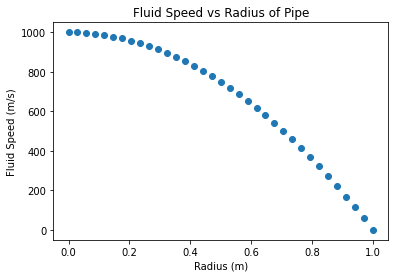

In [2]:
def V(r,P1,P2,eta,l):
    V = ((R**2-r**2)*(P1-P2))/(4*eta*l)
    return V

P2 = 1.01E5
r = np.linspace(0,1,35)
R = 1
eta = 250E-3
P1 = 1.02E5
l = 1

V = np.array(V(r,P1,P2,eta,l))
plt.scatter(r,V)
plt.title('Fluid Speed vs Radius of Pipe')
plt.ylabel('Fluid Speed (m/s)')
plt.xlabel('Radius (m)')

Text(0.5, 0, 'Radius (m)')

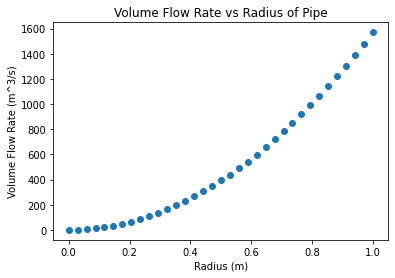

In [3]:
def Q(r,P1,P2,eta,l):
    Q = ((np.pi)*(r**2)*(P1-P2))/(8*eta*l)
    return Q

P2 = 1.01E5
r = np.linspace(0,1,35)
eta = 250E-3
P1 = 1.02E5
l = 1

Q = np.array(Q(r,P1,P2,eta,l))
plt.scatter(r,Q)
plt.title('Volume Flow Rate vs Radius of Pipe')
plt.ylabel('Volume Flow Rate (m^3/s)')
plt.xlabel('Radius (m)')

In [ ]:
from vpython import *
scene = canvas()
scene.background = color.gray(0.8)
scene.forward = vec(-1,-1,-1)
print(scene.camera.pos)
print(scene.camera.axis)

r = 1

xaxis=cylinder(color=vector(1,0,0), pos=vector(0,0,0), axis=vector(1,0,0), radius=0.1)
xlbl=label(pos=vector(1.2,0,0), text="X", color=color.red, opacity=0, height=20, box=0)
yaxis=cylinder(color=color.green, pos=vector(0,0,0), axis=vector(0,1,0), radius=0.1)
ylbl=label(pos=vector(0,1.2,0), text="Y", color=color.green, opacity=0, height=20, box=0)
zaxis=cylinder(color=color.blue, pos=vector(0,0,0), axis=vector(0,0,1), radius=0.1)
xlbl=label(pos=vector(0,0,1.2), text="Z", color=color.blue, opacity=0, height=20, box=0)

tube = extrusion(path=[vec(0,0,0), vec(2,0,0)], shape=shapes.circle(radius=1, thickness=0.2),
                    pos=vec(1,0,0), axis=vec(2,0,0), color=color.white, end_face_color=color.white, opacity = 0.5)
water = cylinder(radius=0.8, thickness=0.2, pos=vec(0,0,0), 
                 axis=vec(2,0,0), color=color.blue, end_face_color=color.blue, opacity = 0.7)
#center = arrow(pos=vec(2,0,0), axis = vec(2,0,0), color=color.red, length=1)
particle = sphere(pos=vector(2,0,0), color=color.red, radius = 1E-3)

angles = np.arange(0,2*pi,pi/5)
print(angles)

arrow_list = []
arrow_list1 = []

for theta in angles:
    arrow_list.append(arrow(pos=vector(2, r*sin(theta), r*cos(theta)), color=color.orange, shaftwidth = 0.05))       
    arrow_list.append(arrow(pos=vector(2, 2*r*sin(theta), 2*r*cos(theta)), color=color.orange, shaftwidth = 0.05))        
    arrow_list1.append(arrow(pos=vector(2,r*cos(theta), r*sin(theta)), color=color.orange,shaftwidth = 0.05, visible=False))       
    arrow_list1.append(arrow(pos=vector(2, 2*r*cos(theta), 2*r*sin(theta)), color=color.orange,shaftwidth = 0.05, visible=False)) 

for thisarrow in arrow_list.concat(arrow_list1):
    # in this loop calculate E at each observation location
    r = thisarrow.pos - particle.pos
    V = ((R**2-r**2)*(P1-P2))/(4*eta*l)
    thisarrow.axis = V
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<1, 1, 1>
<-1, -1, -1>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>